In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px


In [230]:
import pandas as pd

df = pd.read_csv('Dataset/pp-2025.csv', encoding='ISO-8859-1')  # or 'windows-1252'
# removal of whitespaces in the column names
df.columns = df.columns.str.strip()
df.head(5)

,Transaction ID,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,Primary address,Secondary Address,Street Name,Locality,Town/City,District,County,Transaction Type,Status
0,{2D4D7608-D868-BDF9-E063-4804A8C0672F},100000,01 January 2025,S41 7GG,F,N,L,BRINDLEY HOUSE,FLAT 23,TAPTON LOCK HILL,NaN,CHESTERFIELD,CHESTERFIELD,DERBYSHIRE,A,A
1,{2D4D7609-0E15-BDF9-E063-4804A8C0672F},465000,01 January 2025,DA1 3NQ,S,N,F,117,NaN,WENTWORTH DRIVE,NaN,DARTFORD,DARTFORD,KENT,A,A
2,{36A61A95-481C-DEF2-E063-4704A8C046AE},160000,01 January 2025,SK5 6PT,T,N,L,28,NaN,HOBSON STREET,NaN,STOCKPORT,STOCKPORT,GREATER MANCHESTER,B,A
3,{2F7F2B43-D937-E08F-E063-4804A8C05A49},300000,01 January 2025,B30 2PE,O,N,F,45,NaN,HAZELWELL ROAD,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,B,A
4,{31C68072-9735-FEE3-E063-4804A8C04F37},335000,01 January 2025,RH6 9UL,T,N,F,5,NaN,MAIZE CROFT,NaN,HORLEY,REIGATE AND BANSTEAD,SURREY,A,A


__Number of missing rows values__

In [231]:
print('Number of rows:',len(df.index))
print('Number of columns',len(df.columns))


Number of rows: 203849
Number of columns 16


In [232]:
print(df.isnull().sum())

Transaction ID            0
Price                     0
Date of Transfer          0
Postcode                173
Property Type             0
Old/New                   0
Duration                  0
Primary address           0
Secondary Address    180441
Street Name            2637
Locality             127672
Town/City                 0
District                  0
County                    0
Transaction Type          0
Status                    0
dtype: int64


Postcode has less number of missing values. Therefore, dropping the rows.

In [233]:
df.dropna(subset=['Postcode'],inplace=True)

Since the columns like Secondary Address, Street Name and Locality could be left as empty. As we have the important features like postcode, town/city, which gives the rich information regarding the location. 
Therefore, we will mark as N/A and Unknown.

In [234]:
print(df.isnull().sum())

Transaction ID            0
Price                     0
Date of Transfer          0
Postcode                  0
Property Type             0
Old/New                   0
Duration                  0
Primary address           0
Secondary Address    180321
Street Name            2607
Locality             127589
Town/City                 0
District                  0
County                    0
Transaction Type          0
Status                    0
dtype: int64


In [235]:
df['Secondary Address'].fillna('N/A', inplace=True)
df['Street Name'].fillna('N/A', inplace=True)
df['Locality'].fillna('Unknown', inplace=True)

C:\Users\sanja\AppData\Local\Temp\ipykernel_13504\4101782801.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\sanja\AppData\Local\Temp\ipykernel_13504\4101782801.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [236]:
print(df.isnull().sum())

Transaction ID       0
Price                0
Date of Transfer     0
Postcode             0
Property Type        0
Old/New              0
Duration             0
Primary address      0
Secondary Address    0
Street Name          0
Locality             0
Town/City            0
District             0
County               0
Transaction Type     0
Status               0
dtype: int64


__Visualisation of distribution__


In [237]:
print('Number of Unique Property Type: ',df['Property Type'].nunique())
df['Property Type'].unique()
# T = terraced, F = flat-maisonette, S = semi-detached, D = detached, O = other


Number of Unique Property Type:  5


array(['F', 'S', 'T', 'O', 'D'], dtype=object)

In [238]:
print(df.dtypes[["Property Type", "Price"]])

Property Type    object
Price             int64
dtype: object


In [239]:
print(df['Price'].describe())


count    2.036760e+05
mean     3.509992e+05
std      6.537988e+05
min      1.000000e+02
25%      1.880000e+05
50%      2.840000e+05
75%      4.200000e+05
max      1.095000e+08
Name: Price, dtype: float64


C:\Users\sanja\AppData\Local\Temp\ipykernel_13504\1154746373.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




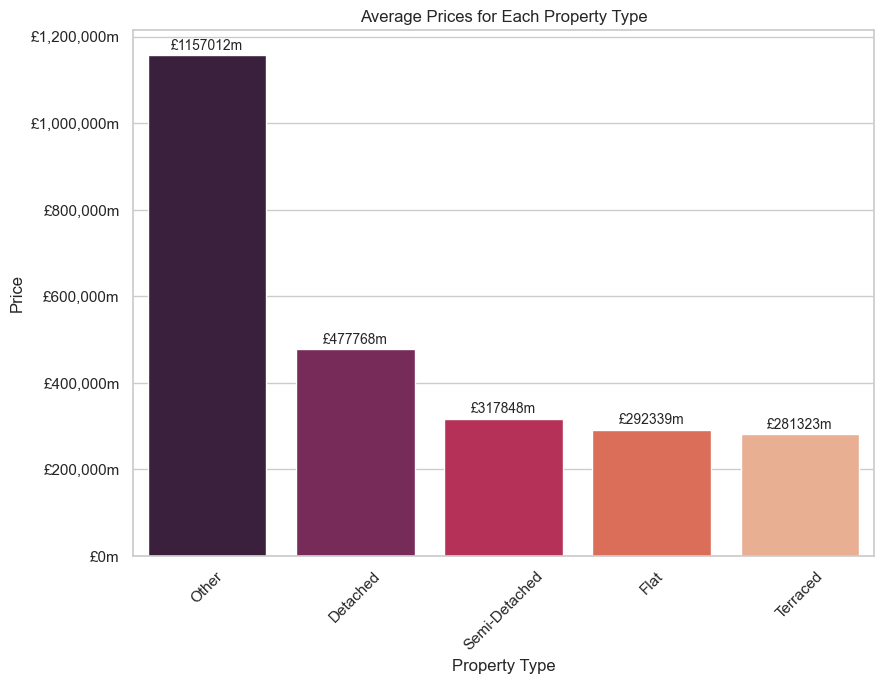

In [240]:

propertymap={'D': 'Detached', 'S': 'Semi-Detached', 'T': 'Terraced', 'F': 'Flat', 'O': 'Other'}

df['Full Property Type']=df['Property Type'].map(propertymap)


# sns.set_theme(style='dark',palette='deep')
plt.figure(figsize=(9,7))
sns.set_theme(style="whitegrid")

# visualisaton
ax=sns.barplot(
    data=df, x='Full Property Type', y='Price', estimator='mean', errorbar=None, 
    palette='rocket',
    # order by the mean price and sort in descending order
    order=df.groupby("Full Property Type")['Price'].mean().sort_values(ascending=False).index
)

# formatting y axis
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '£{:,.0f}'.format(x) + 'm'))



# labels on the bar
for labels in ax.containers:
    # ax.bar_label(labels,fmt='£%.0f',padding=2,fontsize=10)
    ax.bar_label(labels, fmt='£{:.0f}m'.format, padding=2, fontsize=10)

# labels

plt.title('Average Prices for Each Property Type')
plt.ylabel('Price')
plt.xlabel('Property Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average Price over time


In [ ]:
df['Date of Transfer'].describe()

count            203676
unique              148
top       28 March 2025
freq              14388
Name: Date of Transfer, dtype: object

In [242]:
df

,Transaction ID,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,Primary address,Secondary Address,Street Name,Locality,Town/City,District,County,Transaction Type,Status,Full Property Type
0,{2D4D7608-D868-BDF9-E063-4804A8C0672F},100000,01 January 2025,S41 7GG,F,N,L,BRINDLEY HOUSE,FLAT 23,TAPTON LOCK HILL,Unknown,CHESTERFIELD,CHESTERFIELD,DERBYSHIRE,A,A,Flat
1,{2D4D7609-0E15-BDF9-E063-4804A8C0672F},465000,01 January 2025,DA1 3NQ,S,N,F,117,N/A,WENTWORTH DRIVE,Unknown,DARTFORD,DARTFORD,KENT,A,A,Semi-Detached
2,{36A61A95-481C-DEF2-E063-4704A8C046AE},160000,01 January 2025,SK5 6PT,T,N,L,28,N/A,HOBSON STREET,Unknown,STOCKPORT,STOCKPORT,GREATER MANCHESTER,B,A,Terraced
3,{2F7F2B43-D937-E08F-E063-4804A8C05A49},300000,01 January 2025,B30 2PE,O,N,F,45,N/A,HAZELWELL ROAD,Unknown,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,B,A,Other
4,{31C68072-9735-FEE3-E063-4804A8C04F37},335000,01 January 2025,RH6 9UL,T,N,F,5,N/A,MAIZE CROFT,Unknown,HORLEY,REIGATE AND BANSTEAD,SURREY,A,A,Terraced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203844,{36A61A94-8E3C-DEF2-E063-4704A8C046AE},345000,30 May 2025,BS37 5DX,D,N,F,99,N/A,WINDSOR DRIVE,YATE,BRISTOL,SOUTH GLOUCESTERSHIRE,SOUTH GLOUCESTERSHIRE,A,A,Detached
203845,{36A61A94-8A72-DEF2-E063-4704A8C046AE},295000,30 May 2025,SK8 1PW,T,N,F,24,N/A,CRESCENT ROAD,Unknown,CHEADLE,STOCKPORT,GREATER MANCHESTER,A,A,Terraced
203846,{36A61A94-77CD-DEF2-E063-4704A8C046AE},165000,30 May 2025,S40 4TE,D,N,F,16,N/A,GLADSTONE ROAD,Unknown,CHESTERFIELD,CHESTERFIELD,DERBYSHIRE,A,A,Detached
203847,{36A61A94-7EDD-DEF2-E063-4704A8C046AE},530000,30 May 2025,BN20 9EF,D,N,F,16,N/A,BUCKHURST CLOSE,Unknown,EASTBOURNE,EASTBOURNE,EAST SUSSEX,A,A,Detached


Outlier

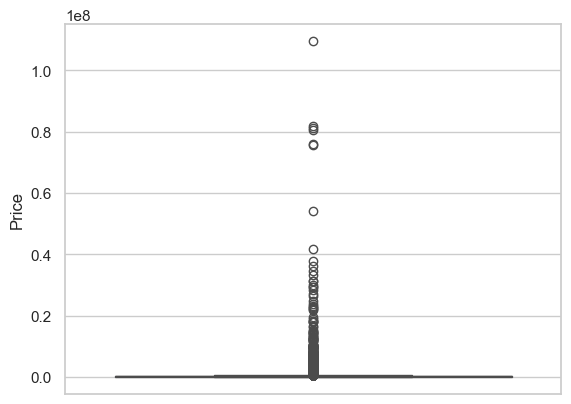

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df['Price'])  # Boxplot to visualize outliers in 'Price'

# Identify outliers using Z-score or IQR methods
from scipy import stats
z_scores = stats.zscore(df[['Price']])
df_outliers = df[(z_scores > 3) | (z_scores < -3)]  # Filter out outliers


Correlation heatmap

<Axes: xlabel='Property Type', ylabel='Price'>

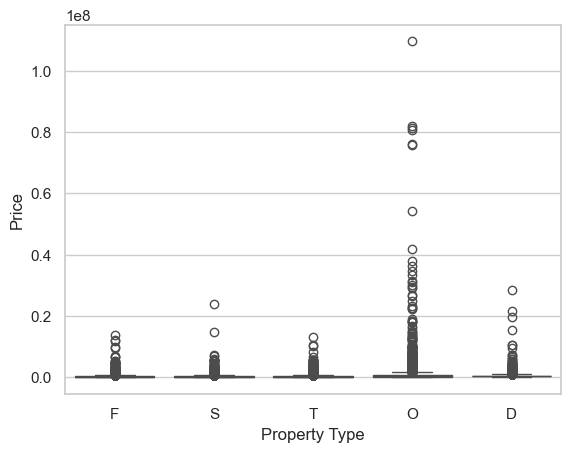

In [244]:
sns.boxplot(x='Property Type', y='Price', data=df)


In [245]:
from scipy import stats

z_scores = stats.zscore(df[['Price']])
outliers = df[(z_scores > 3) | (z_scores < -3)]
print(outliers)

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR))]
print(outliers)


                                Transaction ID    Price Date of Transfer  \
95      {31C68071-B5F4-FEE3-E063-4804A8C04F37}  6815000  02 January 2025   
165     {2D4D7609-E3C9-BDF9-E063-4804A8C0672F}  4775000  02 January 2025   
592     {2D4D7609-0CDA-BDF9-E063-4804A8C0672F}  2350000  03 January 2025   
1383    {2D4D7609-D21D-BDF9-E063-4804A8C0672F}  3200000  03 January 2025   
1612    {2F7F2B42-AA66-E08F-E063-4804A8C05A49}  3100000  03 January 2025   
...                                        ...      ...              ...   
199030  {36A61A94-FAB8-DEF2-E063-4704A8C046AE}  2780000      15 May 2025   
200421  {36A61A94-B793-DEF2-E063-4704A8C046AE}  3600000      16 May 2025   
200578  {36A61A94-473E-DEF2-E063-4704A8C046AE}  2350000      16 May 2025   
203196  {36A61A94-4307-DEF2-E063-4704A8C046AE}  2850000      23 May 2025   
203491  {36A61A95-5BAB-DEF2-E063-4704A8C046AE}  7500000      27 May 2025   

        Postcode Property Type Old/New Duration        Primary address  \
95      SW1E 

<Axes: xlabel='Price', ylabel='Count'>

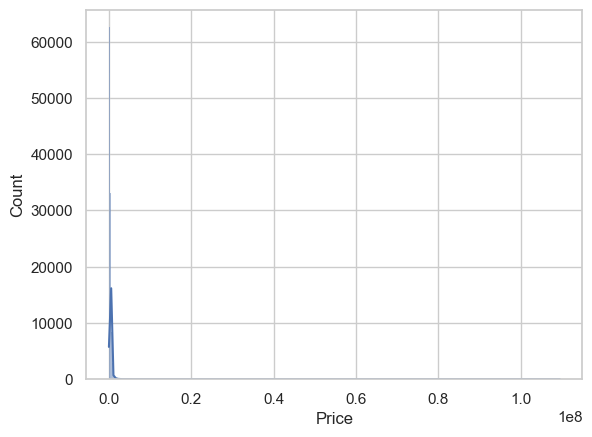

In [246]:
sns.histplot(df['Price'], kde=True)


Capping outlier


In [247]:
cap_value = df['Price'].quantile(0.95)
df['Price'] = np.where(df['Price'] > cap_value, cap_value, df['Price'])


In [248]:
lower_cap_value = df['Price'].quantile(0.05)
df['Price'] = np.where(df['Price'] < lower_cap_value, lower_cap_value, df['Price'])


In [249]:
df

,Transaction ID,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,Primary address,Secondary Address,Street Name,Locality,Town/City,District,County,Transaction Type,Status,Full Property Type
0,{2D4D7608-D868-BDF9-E063-4804A8C0672F},100000.0,01 January 2025,S41 7GG,F,N,L,BRINDLEY HOUSE,FLAT 23,TAPTON LOCK HILL,Unknown,CHESTERFIELD,CHESTERFIELD,DERBYSHIRE,A,A,Flat
1,{2D4D7609-0E15-BDF9-E063-4804A8C0672F},465000.0,01 January 2025,DA1 3NQ,S,N,F,117,N/A,WENTWORTH DRIVE,Unknown,DARTFORD,DARTFORD,KENT,A,A,Semi-Detached
2,{36A61A95-481C-DEF2-E063-4704A8C046AE},160000.0,01 January 2025,SK5 6PT,T,N,L,28,N/A,HOBSON STREET,Unknown,STOCKPORT,STOCKPORT,GREATER MANCHESTER,B,A,Terraced
3,{2F7F2B43-D937-E08F-E063-4804A8C05A49},300000.0,01 January 2025,B30 2PE,O,N,F,45,N/A,HAZELWELL ROAD,Unknown,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,B,A,Other
4,{31C68072-9735-FEE3-E063-4804A8C04F37},335000.0,01 January 2025,RH6 9UL,T,N,F,5,N/A,MAIZE CROFT,Unknown,HORLEY,REIGATE AND BANSTEAD,SURREY,A,A,Terraced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203844,{36A61A94-8E3C-DEF2-E063-4704A8C046AE},345000.0,30 May 2025,BS37 5DX,D,N,F,99,N/A,WINDSOR DRIVE,YATE,BRISTOL,SOUTH GLOUCESTERSHIRE,SOUTH GLOUCESTERSHIRE,A,A,Detached
203845,{36A61A94-8A72-DEF2-E063-4704A8C046AE},295000.0,30 May 2025,SK8 1PW,T,N,F,24,N/A,CRESCENT ROAD,Unknown,CHEADLE,STOCKPORT,GREATER MANCHESTER,A,A,Terraced
203846,{36A61A94-77CD-DEF2-E063-4704A8C046AE},165000.0,30 May 2025,S40 4TE,D,N,F,16,N/A,GLADSTONE ROAD,Unknown,CHESTERFIELD,CHESTERFIELD,DERBYSHIRE,A,A,Detached
203847,{36A61A94-7EDD-DEF2-E063-4704A8C046AE},530000.0,30 May 2025,BN20 9EF,D,N,F,16,N/A,BUCKHURST CLOSE,Unknown,EASTBOURNE,EASTBOURNE,EAST SUSSEX,A,A,Detached


In [220]:
# Convert 'Date of Transfer' to datetime format
df['Date of Transfer'] = pd.to_datetime(df['Date of Transfer'], format='%d %B %Y')

# Now you can extract the weekday (0=Monday, 6=Sunday)
df['Day_of_Week'] = df['Date of Transfer'].dt.weekday


,Transaction ID,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,Primary address,Secondary Address,Street Name,Locality,Town/City,District,County,Transaction Type,Status,Full Property Type,Day_of_Week
0,{2D4D7608-D868-BDF9-E063-4804A8C0672F},100000.0,2025-01-01,S41 7GG,F,N,L,BRINDLEY HOUSE,FLAT 23,TAPTON LOCK HILL,Unknown,CHESTERFIELD,CHESTERFIELD,DERBYSHIRE,A,A,Flat,2
1,{2D4D7609-0E15-BDF9-E063-4804A8C0672F},465000.0,2025-01-01,DA1 3NQ,S,N,F,117,N/A,WENTWORTH DRIVE,Unknown,DARTFORD,DARTFORD,KENT,A,A,Semi-Detached,2
2,{36A61A95-481C-DEF2-E063-4704A8C046AE},160000.0,2025-01-01,SK5 6PT,T,N,L,28,N/A,HOBSON STREET,Unknown,STOCKPORT,STOCKPORT,GREATER MANCHESTER,B,A,Terraced,2
3,{2F7F2B43-D937-E08F-E063-4804A8C05A49},300000.0,2025-01-01,B30 2PE,O,N,F,45,N/A,HAZELWELL ROAD,Unknown,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,B,A,Other,2
4,{31C68072-9735-FEE3-E063-4804A8C04F37},335000.0,2025-01-01,RH6 9UL,T,N,F,5,N/A,MAIZE CROFT,Unknown,HORLEY,REIGATE AND BANSTEAD,SURREY,A,A,Terraced,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203844,{36A61A94-8E3C-DEF2-E063-4704A8C046AE},345000.0,2025-05-30,BS37 5DX,D,N,F,99,N/A,WINDSOR DRIVE,YATE,BRISTOL,SOUTH GLOUCESTERSHIRE,SOUTH GLOUCESTERSHIRE,A,A,Detached,4
203845,{36A61A94-8A72-DEF2-E063-4704A8C046AE},295000.0,2025-05-30,SK8 1PW,T,N,F,24,N/A,CRESCENT ROAD,Unknown,CHEADLE,STOCKPORT,GREATER MANCHESTER,A,A,Terraced,4
203846,{36A61A94-77CD-DEF2-E063-4704A8C046AE},165000.0,2025-05-30,S40 4TE,D,N,F,16,N/A,GLADSTONE ROAD,Unknown,CHESTERFIELD,CHESTERFIELD,DERBYSHIRE,A,A,Detached,4
203847,{36A61A94-7EDD-DEF2-E063-4704A8C046AE},530000.0,2025-05-30,BN20 9EF,D,N,F,16,N/A,BUCKHURST CLOSE,Unknown,EASTBOURNE,EASTBOURNE,EAST SUSSEX,A,A,Detached,4


In [ ]:
df

__Model Building__

In [222]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib
import numpy as np

import lightgbm as lgb
df.head(1)

,Transaction ID,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,Primary address,Secondary Address,Street Name,Locality,Town/City,District,County,Transaction Type,Status,Full Property Type,Day_of_Week
0,{2D4D7608-D868-BDF9-E063-4804A8C0672F},100000.0,2025-01-01,S41 7GG,F,N,L,BRINDLEY HOUSE,FLAT 23,TAPTON LOCK HILL,Unknown,CHESTERFIELD,CHESTERFIELD,DERBYSHIRE,A,A,Flat,2


In [223]:
# feature engineering
df['Date of Transfer'] = pd.to_datetime(df['Date of Transfer'])
# df['Year'] = df['Date of Transfer'].dt.year
df['Month'] = df['Date of Transfer'].dt.month
df['Postcode_Prefix'] = df['Postcode'].str[:3]
df['Town/City'] = df['Town/City'].str.strip()

# finding the average price based on postcode
avgpostprice = df.groupby('Postcode_Prefix')['Price'].mean().to_dict()
df['Postcode_Avg_Price'] = df['Postcode_Prefix'].map(avgpostprice)

# high cardinality features
feature1 = ['Property Type', 'Old/New', 'Duration', 'County', 'Town/City', 'Postcode_Prefix', 'Month', 'Postcode_Avg_Price']
target = 'Price'

df_model = df[feature1 + [target]].dropna().copy()
df_model['log_price'] = np.log1p(df_model[target])  # log-transform target

# one hot encoding the column which provides specific location
for col in ['County', 'Town/City', 'Postcode_Prefix']:
    mean_map = df_model.groupby(col)['log_price'].mean()
    df_model[col + '_encoded'] = df_model[col].map(mean_map)

# updated features
feature2 = ['Property Type', 'Old/New', 'Duration', 'Month',
                  'Postcode_Avg_Price', 'County_encoded', 'Town/City_encoded', 'Postcode_Prefix_encoded']
X = df_model[feature2]
y = df_model['log_price']


In [224]:
df_model[feature2]

,Property Type,Old/New,Duration,Month,Postcode_Avg_Price,County_encoded,Town/City_encoded,Postcode_Prefix_encoded
0,F,N,L,1,211449.781022,12.321592,12.168339,12.172662
1,S,N,F,1,398861.037962,12.735623,12.805820,12.828246
2,T,N,L,1,225771.398551,12.326203,12.548606,12.279747
3,O,N,F,1,283594.956140,12.331297,12.327543,12.474844
4,T,N,F,1,444818.942308,13.028001,12.931574,12.931574
...,...,...,...,...,...,...,...,...
203844,D,N,F,5,371532.918707,12.698507,12.754959,12.756142
203845,T,N,F,5,368682.967213,12.326203,12.726855,12.726855
203846,D,N,F,5,213180.740741,12.321592,12.168339,12.151081
203847,D,N,F,5,349269.721798,12.705654,12.541177,12.670217


In [228]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Define numerical and categorical columns
standardcols = ['Postcode_Avg_Price', 'Month', 'Postcode_Prefix_encoded']  # Only numerical columns for scaling
oneHotCols = ['Property Type', 'Old/New', 'Duration', 'Town/City_encoded']  # Only categorical columns for one-hot encoding

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), oneHotCols),  # One-hot encode categorical features
        ('standardscalar', StandardScaler(), standardcols)   # Scale numerical features
    ],
    remainder='passthrough'  # Keep other columns as is (if any remain after transformers)
)

# Define the complete pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))  # Add the RandomForest model
])

# Train the model with the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


ValueError: Found unknown categories [np.float64(11.49273296168228), np.float64(11.526422839807577), np.float64(11.728809207706982), np.float64(11.964007453736912), np.float64(12.013706813470414), np.float64(12.027116052276561), np.float64(12.04355959836804), np.float64(12.122147468250375), np.float64(12.136447100353411), np.float64(12.138869243416009), np.float64(12.153953198089239), np.float64(12.156306062256812), np.float64(12.159653090426882), np.float64(12.160978778314906), np.float64(12.193981177469192), np.float64(12.214875486274092), np.float64(12.235450018171754), np.float64(12.265968010541137), np.float64(12.278397958261774), np.float64(12.281364020992708), np.float64(12.342386568798112), np.float64(12.369288087244868), np.float64(12.37227491088747), np.float64(12.39134178304963), np.float64(12.405896597448024), np.float64(12.422213770506666), np.float64(12.441628562813063), np.float64(12.461894519319513), np.float64(12.49304647536209), np.float64(12.51734098739511), np.float64(12.526190445900584), np.float64(12.530457556012385), np.float64(12.539800275546527), np.float64(12.607637105857222), np.float64(12.62453571419903), np.float64(12.6671693580563), np.float64(12.672920683459514), np.float64(12.684600029562006), np.float64(12.70562668818692), np.float64(12.74194014711586), np.float64(12.795636428143936), np.float64(12.814273752128704), np.float64(12.891914608221313), np.float64(12.931454521401635), np.float64(12.958263454537512), np.float64(12.981169425587881), np.float64(13.031293412399362), np.float64(13.10662009752006), np.float64(13.183736089305707)] in column 3 during transform

In [ ]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# label encoding
standardcols = ['Postcode_Avg_Price', 'Month', 'Postcode_Prefix_encoded']  # numerical columns
oneHotCols = ['Property Type', 'Old/New', 'Duration', 'Town/City_encoded']  # categorical columns

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), oneHotCols),  # categorical variables
        ('standardscalar', StandardScaler(), standardcols)   # numerical features
    ],
    remainder='passthrough'  # Keep other columns as is (if any remain after transformers)
)

# pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(max_depth=2,random_state=42)) 
])


# hyperparameter tuning
paramgrid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10],
    'model__min_samples_split': [2, 5]
}

gridsearchRF=GridSearchCV(
    estimator=pipeline, param_grid=paramgrid,
    cv=3,scoring='neg_mean_absolute_error',
    n_jobs=-1, verbose=2
    )

# fit with best estimator
gridsearchRF.fit(X_train, y_train)

print(f"Best Hyperparameters: {gridsearchRF.best_params_}")
print(f"Best Cross-Validation Score: {gridsearchRF.best_score_}")

bestmodel=gridsearchRF.best_estimator_
# prediction
y_pred = bestmodel.predict(X_test)

# evaluate model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# saving the model
joblib.dump(bestmodel,'RFmodel.pkl')


f:\Project\HM Land Registry\myvenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros



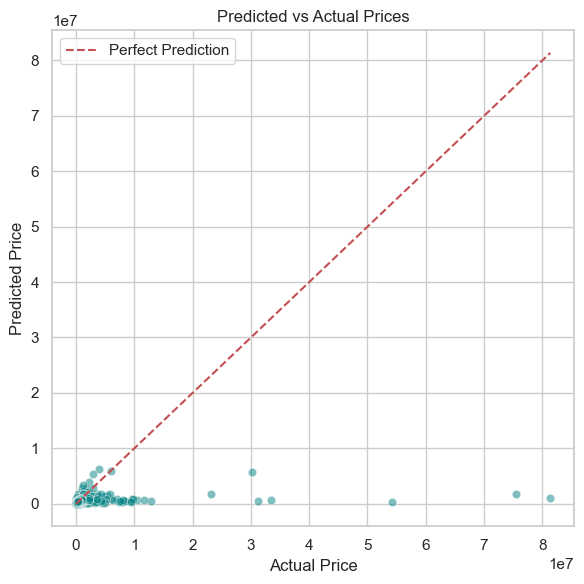

In [ ]:
# visualisation
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_actual, y=y_pred_actual, alpha=0.5, color='teal')
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         '--r', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
